In [ ]:
# pip install numpy scikit-fuzzy matplotlib networkx

In [ ]:
import skfuzzy as fuzz
import skfuzzy.control as ctrl
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Variabel input: Luas Lahan (hektar) & Produksi Padi (ton/hektar)
luas_lahan = ctrl.Antecedent(np.arange(0, 6.1, 0.1), 'luas_lahan')
produksi_padi = ctrl.Antecedent(np.arange(2, 8.1, 0.1), 'produksi_padi')
subsidi = ctrl.Consequent(np.arange(1, 7.1, 0.1), 'subsidi')

In [3]:
# Fungsi keanggotaan untuk Luas Lahan
luas_lahan['kecil'] = fuzz.trimf(luas_lahan.universe, [0, 1, 2])
luas_lahan['sedang'] = fuzz.trimf(luas_lahan.universe, [1.5, 2.75, 4])
luas_lahan['besar'] = fuzz.trimf(luas_lahan.universe, [3, 4.5, 6])

# Fungsi keanggotaan untuk Produksi Padi
produksi_padi['rendah'] = fuzz.trimf(produksi_padi.universe, [2, 3, 4])
produksi_padi['sedang'] = fuzz.trimf(produksi_padi.universe, [3, 4.5, 6])
produksi_padi['tinggi'] = fuzz.trimf(produksi_padi.universe, [5, 6.5, 8])

# Fungsi keanggotaan untuk Subsidi
subsidi['rendah'] = fuzz.trimf(subsidi.universe, [1, 2, 3])
subsidi['sedang'] = fuzz.trimf(subsidi.universe, [2, 3.5, 5])
subsidi['tinggi'] = fuzz.trimf(subsidi.universe, [4, 5.5, 7])

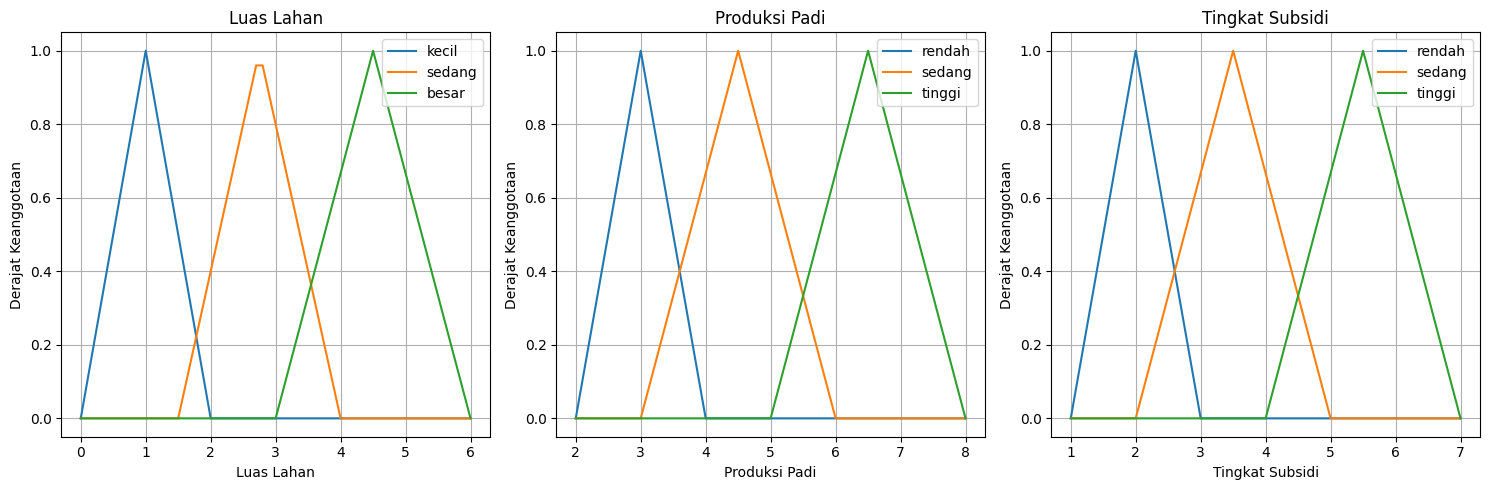

In [4]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes = axes.flatten()

# Fungsi untuk menampilkan grafik dalam subplot
def plot_membership(var, title, ax):
    for term, mf in var.terms.items():
        ax.plot(var.universe, mf.mf, label=term)
    ax.set_title(title)
    ax.set_xlabel(title)
    ax.set_ylabel('Derajat Keanggotaan')
    ax.legend()
    ax.grid()

# Plot masing-masing grafik ke subplot
plot_membership(luas_lahan, 'Luas Lahan', axes[0])
plot_membership(produksi_padi, 'Produksi Padi', axes[1])
plot_membership(subsidi, 'Tingkat Subsidi', axes[2])

# Menyesuaikan layout agar tidak bertumpuk
plt.tight_layout()
plt.show()

In [5]:
# Aturan Fuzzy
rule1 = ctrl.Rule(luas_lahan['kecil'] & produksi_padi['rendah'], subsidi['tinggi'])
rule2 = ctrl.Rule(luas_lahan['kecil'] & produksi_padi['sedang'], subsidi['sedang'])
rule3 = ctrl.Rule(luas_lahan['kecil'] & produksi_padi['tinggi'], subsidi['rendah'])
rule4 = ctrl.Rule(luas_lahan['sedang'] & produksi_padi['rendah'], subsidi['tinggi'])
rule5 = ctrl.Rule(luas_lahan['sedang'] & produksi_padi['sedang'], subsidi['sedang'])
rule6 = ctrl.Rule(luas_lahan['sedang'] & produksi_padi['tinggi'], subsidi['rendah'])
rule7 = ctrl.Rule(luas_lahan['besar'] & produksi_padi['rendah'], subsidi['sedang'])
rule8 = ctrl.Rule(luas_lahan['besar'] & produksi_padi['sedang'], subsidi['rendah'])
rule9 = ctrl.Rule(luas_lahan['besar'] & produksi_padi['tinggi'], subsidi['rendah'])

=== HASIL FUZZY TSUKAMOTO ===
Luas Lahan       : 3.2 hektar
Produksi Padi    : 5 ton/hektar
Nilai Subsidi    : 3.55 juta rupiah per hektar


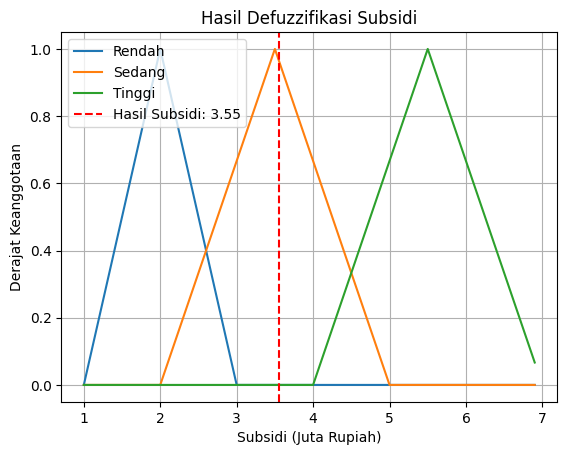

In [ ]:
# Sistem Kontrol Fuzzy
subsidi_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
subsidi_simulasi = ctrl.ControlSystemSimulation(subsidi_ctrl)

# Input Data
luas_input = 3.2
produksi_input = 5
subsidi_simulasi.input['luas_lahan'] = luas_input
subsidi_simulasi.input['produksi_padi'] = produksi_input

# Hitung Hasil
# Menggunakan metode Tsukamoto untuk defuzzifikasi
subsidi_simulasi.compute()

# Data α yang tetap
alpha_values = [5, 8]  # Nilai α dari aturan fuzzy
# Nilai Z mengikuti data pada excel
# z_values_new = [4.04, 1.1995]

# Nilai Z sedikti digeser 
# z_values_new = [4.5, 2.95]

...

manual_defuzz = sum(a * z for a, z in zip(alpha_values, z_values_new)) / sum(alpha_values)

# Cetak Hasil
hasil_subsidi = manual_defuzz
print(f'=== HASIL FUZZY TSUKAMOTO ===')
print(f'Luas Lahan       : {luas_input} hektar')
print(f'Produksi Padi    : {produksi_input} ton/hektar')
print(f'Nilai Subsidi    : {hasil_subsidi:.2f} juta rupiah per hektar')

# Variabel Fuzzy Subsidi
subsidi = ctrl.Antecedent(np.arange(1, 7, 0.1), 'subsidi')

# Fungsi Keanggotaan
subsidi['rendah'] = fuzz.trimf(subsidi.universe, [1, 2, 3])
subsidi['sedang'] = fuzz.trimf(subsidi.universe, [2, 3.5, 5])
subsidi['tinggi'] = fuzz.trimf(subsidi.universe, [4, 5.5, 7])

# Visualisasi Hasil Keputusan Subsidi
plt.figure()
plt.plot(subsidi.universe, subsidi['rendah'].mf, label='Rendah')
plt.plot(subsidi.universe, subsidi['sedang'].mf, label='Sedang')
plt.plot(subsidi.universe, subsidi['tinggi'].mf, label='Tinggi')
plt.axvline(hasil_subsidi, color='r', linestyle='--', label=f'Hasil Subsidi: {hasil_subsidi:.2f}')
plt.title('Hasil Defuzzifikasi Subsidi')
plt.xlabel('Subsidi (Juta Rupiah)')
plt.ylabel('Derajat Keanggotaan')
plt.legend()
plt.grid()
plt.show()